In [4]:
# -*- coding: utf-8 -*-
"""
Created on Tue Mar 17 16:48:11 2015

@author: ruifpmaia
"""

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob
import os

%matplotlib inline

In [5]:
def processOutput(path, dataset, train_epo):
    print "*********************************"
    print "Analysing dataset [%s] results on [%s]" % (dataset, path )
    print "*********************************"
    rmse = {}
    mae = {}
    min_rmse = {}
    rmse_train = {}
    min_k = 0 # minimun RMSE on the test
    # For each k...
    #for k in [5,10,15,20,25]:
    #for k in [5,25,50,100]:
    for k in [5,25]:
        #print "Getting RSME for k=" + str(k)
        extension = "*.k" + str(k) + ".csv"
        test_count = 0;
        # print extension
        rmse[k] = 0.0
        mae[k] = 0.0
        rmse_train[k] = {}
        min_rmse[k] = {'min':0, 'idx':0, 'file':''}
        for ix in range(train_epo):
            rmse_train[k][ix]=0            
        # Analyse each file...
        for filename in glob.glob(os.path.join(path, extension)):
            #print filename
            if (filename.find(dataset) >= 0):        
                # read results file
                df = pd.read_csv(filename, usecols=[0], sep='\t')
                mae_col = pd.read_csv(filename, usecols=[1], sep='\t')
                # get last RMSE and add it to the total rmse
                rmse[k] += df.values[train_epo-1]
                mae[k] += mae_col.values[train_epo-1]
                train_iter_idx = 0
                test_count += 1
                # add iteration values to dic                 
                for iter_val in range(train_epo):
                    rmse_train[k][train_iter_idx] += df.values[train_iter_idx]
                    if (min_rmse[k]['min'] == 0):
                        min_rmse[k]['min'] = df.values[train_iter_idx]
                        min_rmse[k]['idx'] = train_iter_idx
                        min_rmse[k]['file'] = filename
                    elif (min_rmse[k]['min'] > df.values[train_iter_idx]):
                        min_rmse[k]['min'] = df.values[train_iter_idx]   
                        min_rmse[k]['idx'] = train_iter_idx
                        min_rmse[k]['file'] = filename
                    train_iter_idx += 1     
        #get the average of RMSE for K = n
        rmse[k] /= test_count
        mae[k] /= test_count
        if (k == 5):
            min_k = 5
        elif (rmse[k] < rmse[min_k]):
            min_k = k
        train_iter_idx = 0
        for iter_val in rmse_train[k]:
            rmse_train[k][train_iter_idx] /= test_count
            train_iter_idx += 1        
        #print "Analysed %d csv result/test files" % test_count
        print "Average RMSE for k=" + str(k) + ": %.4f" % rmse[k]
        #print "Minimum RMSE for k=" + str(k) + ": %.4f on iteration %d on file [%s]" % (min_rmse[k]['min'], min_rmse[k]['idx'], min_rmse[k]['file'])
    return (rmse_train, rmse, mae, min_k)


def Analyse(path, dataset_list, train_epo):
    legend = []
    res_dic = {}
    plt.gca().set_color_cycle(['red', 'green', 'blue', 'yellow', 'gray'])
    x = np.arange(train_epo)
    for dataset in dataset_list:
        avgres = 0.0
        res_dic[dataset] = {}
        try:
            avgres_fn = dataset + "rmse.avg"
            avgres_fn = os.path.join(path, avgres_fn)
            with open(avgres_fn) as resf:
                avgres = float(resf.readline())
                res_dic[dataset]['AVG'] = avgres
        except IOError:
            print "No RMSE result using AVG for Prediction"      
        try:
            maeres_fn = dataset + "mae.avg"
            maeres_fn = os.path.join(path, maeres_fn)
            with open(maeres_fn) as resf:
                maeres = float(resf.readline())
                res_dic[dataset]['MAE'] = avgres
        except IOError:
            print "No MAE result using AVG for Prediction"
        (rmse_train, rmse, mae, min_k) = processOutput(path, dataset, train_epo)
        plt.plot(x, rmse_train[min_k].values())
        legend.append("%s[k%d] RMSE: %.4f MAE:%.4f [RMSE-AVG:%.4f MAE-AVG:%.4f]" % (dataset, min_k, rmse[min_k], mae[min_k], float(avgres), float(maeres)))
        res_dic[dataset][str('FM-k%d'% min_k)] = rmse[min_k][0]
    fig = plt.gcf()
    fig.set_size_inches(13,9)
    plt.grid(True)
    plt.legend(legend, loc='upper left')
    plt.show()
    plt.draw()
    return 0

## kochbar (7M) Results Analysis - MCMC - 100 iter-5Fold

*********************************
Analysing dataset [kochbar_ds.] results on [kochbar\Output]
*********************************
Average RMSE for k=5: 0.2198
Average RMSE for k=25: 0.2138
*********************************
Analysing dataset [kochbar_ds2.] results on [kochbar\Output]
*********************************
Average RMSE for k=5: 0.1953
Average RMSE for k=25: 0.1988
*********************************
Analysing dataset [kochbar_ds3.] results on [kochbar\Output]
*********************************
Average RMSE for k=5: 0.1968
Average RMSE for k=25: 0.1992
No RMSE result using AVG for Prediction
No MAE result using AVG for Prediction
*********************************
Analysing dataset [kochbar_ds4.] results on [kochbar\Output]
*********************************
Average RMSE for k=5: 0.1926
Average RMSE for k=25: 0.1988
No RMSE result using AVG for Prediction
No MAE result using AVG for Prediction
*********************************
Analysing dataset [kochbar_ds5.] results on [kochbar\Outp

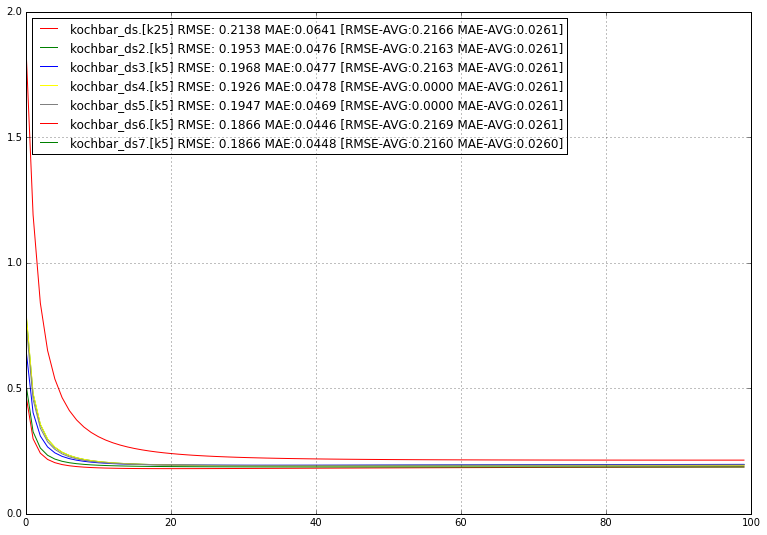

kochbar_ds - Rating + Users + Item
kochbar_ds2 - Rating + Users + Item + AvgRatUser
kochbar_ds3 - Rating + Users + Item + AvgRatUser + StdDevUser
kochbar_ds4 - Rating + Users + Item + AvgRatItem
kochbar_ds5 - Rating + Users + Item + AvgRatItem + StdDevItem
kochbar_ds6 - Rating + Users + Item + AvgRatUser + AvgRatItem
kochbar_ds7 - Rating + Users + Item + AvgRatUser + StdDevUser + AvgRatItem + StdDevItem



In [8]:
Analyse('kochbar\\Output', ['kochbar_ds.','kochbar_ds2.','kochbar_ds3.','kochbar_ds4.','kochbar_ds5.','kochbar_ds6.','kochbar_ds7.'], 100)
print 'kochbar_ds - Rating + Users + Item\nkochbar_ds2 - Rating + Users + Item + AvgRatUser\nkochbar_ds3 - Rating + Users + Item + AvgRatUser + StdDevUser\nkochbar_ds4 - Rating + Users + Item + AvgRatItem\nkochbar_ds5 - Rating + Users + Item + AvgRatItem + StdDevItem\nkochbar_ds6 - Rating + Users + Item + AvgRatUser + AvgRatItem\nkochbar_ds7 - Rating + Users + Item + AvgRatUser + StdDevUser + AvgRatItem + StdDevItem\n'

### User Rating Average and Standard Deviation Histograms

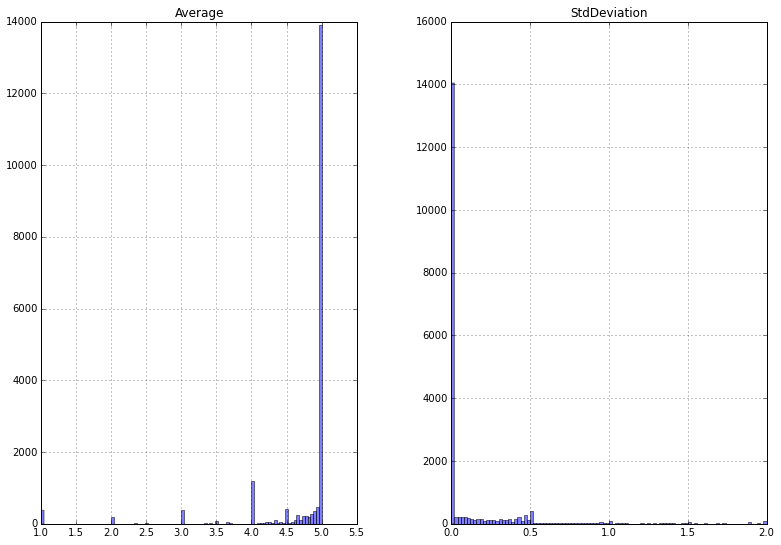

In [15]:
user_stats = pd.read_csv('kochbar\\Input\\kochbar_ds.usr.avgstd', usecols=[0,1], sep='\t')
user_stats.hist(alpha=0.5, bins=100)
fig = plt.gcf()
fig.set_size_inches(13,9)
plt.show()


### Item Rating Average and Standard Deviation Histograms

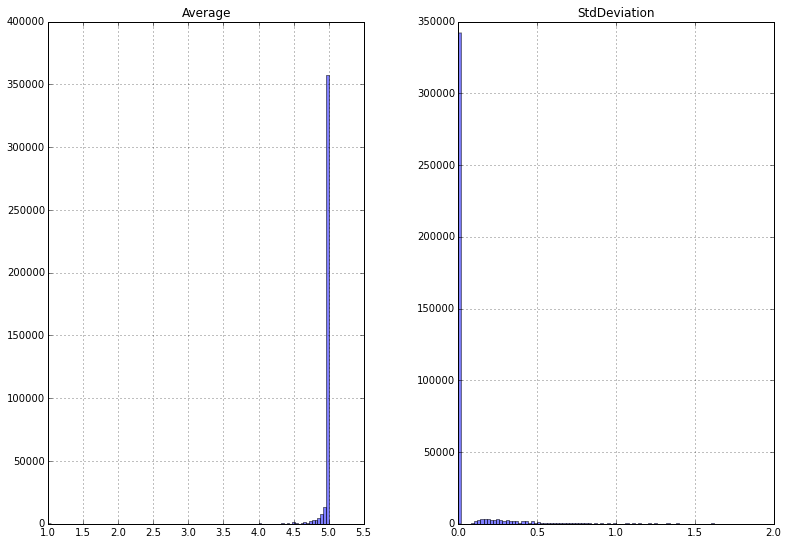

In [16]:
user_stats = pd.read_csv('kochbar\\Input\\kochbar_ds.item.avgstd', usecols=[0,1], sep='\t')
user_stats.hist(alpha=0.5, bins=100)
fig = plt.gcf()
fig.set_size_inches(13,9)
plt.show()